<a href="https://colab.research.google.com/github/celamyrrha/analise_de_dados_CECIERJ/blob/main/Avalia%C3%A7%C3%A3o02_Marcela_Myrrha_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avaliação 2 - Semanas 17 e 18

Esta é **avaliação 2 (A2)**. Você deverá preenchê-la e enviá-la dentro do prazo (até o fechamento da semana corrente).

###Questão 1: Estatística

> O IMDb (*Internet Movie Database*) é uma plataforma online que fornece informações abrangentes sobre filmes, programas de TV e profissionais da indústria do entretenimento, tornando-se uma ferramenta popular para os amantes do cinema e da televisão.

Abaixo, uma seleção dos filmes mais bem avaliados pelo IMDb. As colunas se referem ao seguintes itens:
- `V1`: Título do filme (em inglês)
- `V2`: Avaliação IMDb (0 a 10)
- `V3`: Duração (em minutos)
- `V4`: Gênero
- `V5`: Avaliação externa (0 a 100)
- `V6`: Votos

A partir dela, responda as questões seguintes:


In [ ]:
# Questao 1
# NAO ALTERE ESSES COMANDOS
# A BASE SERA CARREGADA NO OBJETO `filmes`
# USE ESSE OBJETO PARA SEGUIR COM OS EXERCICIOS
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1Q6otN_fXLhwGJkA_4I8xf9UCZrlvTJpw'
output = 'dados_filmes.csv'
gdown.download(url, output, quiet=True)

filmes = pd.read_csv('/content/dados_filmes.csv')
filmes.head()

,V1,V2,V3,V4,V5,V6
0,The Shawshank Redemption,9.3,142,Drama,82.0,2752419
1,The Godfather,9.2,175,Crime,100.0,1914751
2,Ramayana: The Legend of Prince Rama,9.2,135,Animation,NaN,10108
3,The Chaos Class,9.2,87,Comedy,NaN,41785
4,Daman,9.1,121,Adventure,NaN,13303


**(0,25 ponto)** 1.a) Utilizando as melhores práticas de manipulação de base de dados, renomeie as colunas utilizando a definição transcrita no enunciado da questão. Salve a base de dados no mesmo objeto `filmes`.

In [ ]:
# Questao 1
# 1.a)

filmes.columns=['Título do filme (em inglês)','Avaliação IMDb (0 a 10)','Duração (em minutos)','Gênero','Avaliação externa (0 a 100)','Votos']
print(filmes.columns)

Index(['Título do filme (em inglês)', 'Avaliação IMDb (0 a 10)',
       'Duração (em minutos)', 'Gênero', 'Avaliação externa (0 a 100)',
       'Votos'],
      dtype='object')


**(0,25 ponto)** 1.b) A base possui valores faltantes. Remova-os e salve a base de dados no mesmo objeto `filmes`.

In [ ]:
# Questao 1
# 1.b)
filmes = filmes.dropna()


**(0,4 ponto)** 1.c) Após a remoção dos valores faltantes, quantos registros estão disponíveis para análise?

In [ ]:
# Questao 1
# 1.c)
print(filmes.shape)


(7992, 6)


**(0,4 ponto)** 1.d) Qual a duração média **(em horas)** dos filmes dessa seleção?

In [ ]:
# Questao 1
# 1.d)
media_horas = (filmes['Duração (em minutos)']/60).mean()
print(media_horas)



1.8200617283950618


**(0,4 ponto)** 1.e) 50% dos filmes desta lista obtiveram *Avaliação IMDb* maior ou igual a:

In [ ]:
# Questao 1
# 1.e)
mediana = filmes['Avaliação IMDb (0 a 10)'].median()
print(mediana)



6.7


**(0,4 ponto)** 1.f) Qual percentual de filmes receberam *Avaliação externa* maior ou igual a 80?

In [ ]:
# Questao 1
# 1.f)
avaliacao = (filmes['Avaliação externa (0 a 100)'] >= 80).sum() / len(filmes) * 100
print(avaliacao)



12.975475475475475


**(0,4 ponto)** 1.g) Qual filme recebeu o maior número de votos?

In [ ]:
# Questao 1
# 1.g)
ordenado_votos = filmes.sort_values(by='Votos', ascending=False)
filme_mais_votado = ordenado_votos.iloc[0]['Título do filme (em inglês)']
print(filme_mais_votado)


The Shawshank Redemption


**(0,4 ponto)** 1.h) Quantos filmes receberam a maior possível avaliação externa?

In [ ]:
# Questao 1
# 1.h)
avaliacao_maxima = (filmes['Avaliação externa (0 a 100)'].max())
filmes_avaliacao_maxima = filmes[filmes['Avaliação externa (0 a 100)'] == avaliacao_maxima]
qt_avaliacao_maxima = filmes_avaliacao_maxima.shape[0]
print(qt_avaliacao_maxima)


15


**(0,4 ponto)** 1.i) Quantos gêneros distintos há na base de dados?

In [ ]:
# Questao 1
# 1.i)

qt_generos = filmes['Gênero'].nunique()
print(qt_generos)

19


**(0,4 ponto)** 1.j) Crie um gráfico de barras onde o eixo horizontal corresponde aos generos e o eixo vertical corresponde as contagens de filme daquele gênero.

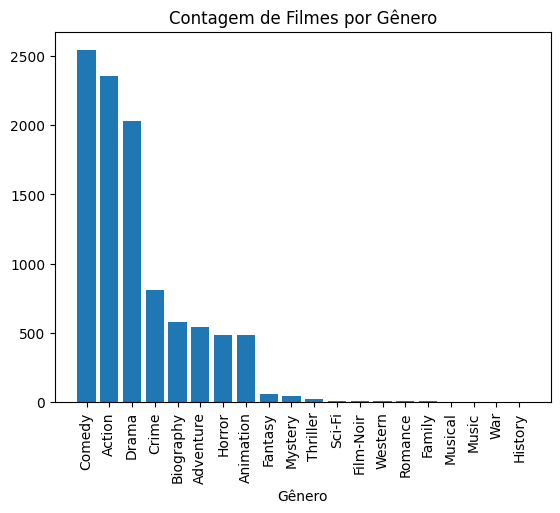

In [ ]:
# Questao 1
# 1.j)
import matplotlib.pyplot as plt

qt_generos = filmes['Gênero'].value_counts()

plt.bar(qt_generos.index, qt_generos.values)
plt.xlabel('Gênero')
plt.xticks(rotation=90)
plt.title('Contagem de Filmes por Gênero')
plt.show()

**(0,4 ponto)** 1.k) Qual a correlação entre a *Avaliação IMDb* e *Avaliação externa*?

In [ ]:
# Questao 1
# 1.k)

print(filmes['Avaliação IMDb (0 a 10)'].corr(filmes['Avaliação externa (0 a 100)']))

0.725949553838788


**(0,4 ponto)** 1.l) Crie um gráfico de dispersão entre *Avaliação IMDb* e *Avaliação externa*.

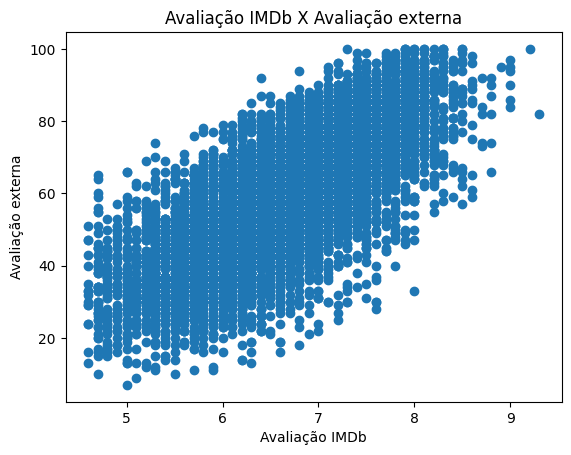

In [ ]:
# Questao 1
# 1.l)
plt.scatter(filmes['Avaliação IMDb (0 a 10)'], filmes['Avaliação externa (0 a 100)'])
plt.xlabel('Avaliação IMDb')
plt.ylabel('Avaliação externa')
plt.title('Avaliação IMDb X Avaliação externa')
plt.show()


###Questão 2: Previsão

> A previsão do preço de imóveis é importante para compradores, vendedores, investidores e instituições financeiras. Ajuda na determinação do valor justo das propriedades, orienta decisões de compra e venda, auxilia investidores a identificar oportunidades lucrativas e apoia o planejamento financeiro a longo prazo. Além disso, é útil para o desenvolvimento urbano, o planejamento imobiliário e a tomada de decisões estratégicas. Em suma, a previsão do preço de imóveis é uma ferramenta valiosa no mercado imobiliário.

> O tamanho do imóvel é um fator importante no preço de venda, pois influencia diretamente a quantidade de espaço habitável, atende às necessidades dos compradores, oferece potencial de uso e adaptação, é comparado a outras propriedades no mercado e pode ter um impacto no valor de revenda no futuro.

A base de dados a seguir se refere às características de imóveis na cidade de Seattle (EUA) e contém as seguintes informações:

- `preco`: Preço do imóvel (convertido para Reais R$)
- `comodos`: Número de cômodos
- `area`: Área (em metros quadrados)

A partir dela, responda as questões seguintes:

In [ ]:
# Questao 2
# NAO ALTERE ESSES COMANDOS
# A BASE SERA CARREGADA NO OBJETO `imoveis`
# USE ESSE OBJETO PARA SEGUIR COM OS EXERCICIOS
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=1AL0SoMujyJ37tF_0rAR6Ri_nQMXszZbL'
output = 'dados_imoveis.csv'
gdown.download(url, output, quiet=True)

imoveis = pd.read_csv('/content/dados_imoveis.csv')
imoveis.head()

,preco,comodos,area
0,1470000.0,2,81.753995
1,1920000.0,4,141.211446
2,4200000.0,4,271.274619
3,1095000.0,3,101.263471
4,3600000.0,5,270.345596


**(0,5 ponto)** 2.a) Qual o número mediano de comodos nessa região?

In [ ]:
# Questao 2
# 2.a)

print(imoveis['comodos'].median())

3.0


**(0,5 ponto)** 2.b) Calcule a correlação entre `area` e `preco`.

In [147]:
# Questao 2
# 2.b)

print(imoveis['area'].corr(imoveis['preco']))

0.6645184769977531


**(0,5 ponto)** 2.c) Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo linear. Utilize **75%** dos dados como conjunto de treinamento.

In [ ]:
# Questao 2
# 2.c)
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
treino, teste = train_test_split(imoveis, train_size=0.75, random_state=123)



**(0,5 ponto)** 2.d) Treine o modelo linear utilizando a base de `treino`.

In [ ]:
# Questao 2
# 2.d)
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['area'])
y_treino = treino['preco']

# Definindo o modelo de regressao linear
reg = LinearRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)


**(0,5 ponto)** 2.e) Avalie a `performance` do ajuste do modelo estimado através do **coeficiente de determinação** $R^2$.

In [ ]:
# Questao 2
# 2.e)

modelo_estimado.score(X = X_treino, y = y_treino)

0.43360353774708305

**(0,5 ponto)** 2.f) Faça um gráfico de dispersão que exibe os dados observados e a reta estimada pelo modelo linear.

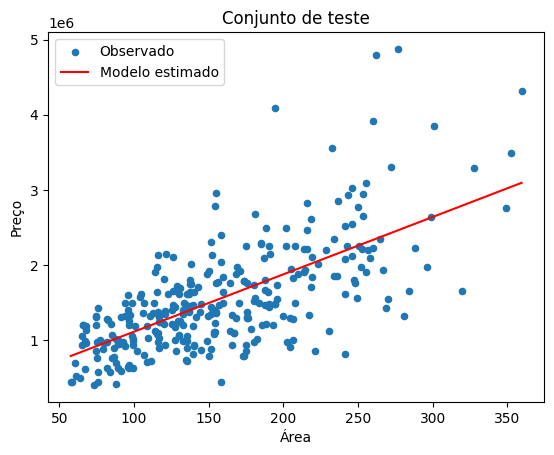

In [ ]:
# Questao 2
# 2.f)

# Grafico de dispersao - conjunto de teste
teste.plot.scatter(x = 'area', y = 'preco', label='Observado')

# Desenhando a linha de previsao
# alfa (tambem chamado de intercepto)
alfa = modelo_estimado.intercept_

# beta
beta = modelo_estimado.coef_[1]

x_prev = np.linspace(teste['area'].min(),
                     teste['area'].max(),
                     100).reshape(-1, 1)
y_prev = alfa + beta * x_prev
plt.plot(x_prev, y_prev, color='red', label='Modelo estimado')

# Rotulos e titulo
plt.xlabel("Área")
plt.ylabel("Preço")
plt.title('Conjunto de teste')

# Legenda
plt.legend()

# Exibindo o grafico
plt.show()

###Questão 3: Classificação

> A previsão do *churn*, ou taxa de rotatividade de clientes, é de extrema importância para empresas de telecomunicações. O *churn* representa a perda de clientes em um determinado período, e sua redução é um objetivo crucial para garantir a sustentabilidade e o crescimento dessas empresas.

> Em resumo, a previsão do *churn* desempenha um papel fundamental no sucesso das empresas de telecomunicações. Ela permite que as empresas tomem medidas proativas para reter os clientes existentes, melhorem seus serviços, aumentem a competitividade, impulsionem a receita e melhorem sua rentabilidade.

> A quantidade de minutos de uso em ligações pode fornecer *insights* valiosos para a previsão do *churn*. Monitorar e analisar esses dados pode ajudar as empresas a entender o engajamento dos clientes, a percepção de valor, a competição com concorrentes e a identificação de mudanças significativas no comportamento do cliente, permitindo que tomem medidas para reter os clientes em risco de *churn*.

A base de dados a seguir se refere às características de clientes em uma companhia de telecomunicações móveis e contém as seguintes informações:

- `churn`: Cliente cancelou o plano (0: Não; 1: Sim)
- `minutos_uso`: Acumulado de minutos em ligações utilizados pelo cliente no mês

A partir dela, responda as questões seguintes:

In [140]:
# Questao 3
# NAO ALTERE ESSES COMANDOS
# A BASE SERA CARREGADA NO OBJETO `clientes`
# USE ESSE OBJETO PARA SEGUIR COM OS EXERCICIOS
import gdown
import pandas as pd

url = 'https://drive.google.com/uc?id=14xWzfpLuzobIlkxmOn2HAbeNUA1zpDP7'
output = 'dados_churn.csv'
gdown.download(url, output, quiet=True)

clientes = pd.read_csv('/content/dados_churn.csv')
clientes.head()



,churn,minutos_uso
0,0,265.1
1,0,161.6
2,0,243.4
3,0,299.4
4,0,166.7


**(0,5 ponto)** 3.a) Calcule a média de uso de ligações em minutos para clientes que cancelaram o plano (`churn == 1`) e não cancelaram o plano (`churn == 0`). Há diferença?

In [141]:
# Questao 3
# 3.a)
# Médias de minutos das ligações dos clientes que cancelaram
cancelaram = clientes[clientes['churn'] == 1]
minutos_cancelamento = cancelaram['minutos_uso'].mean()
print(f'Média de ligações de clientes que cancelaram: {minutos_cancelamento}')

# Médias de minutos das ligações dos clientes que não cancelaram
cancelaram = clientes[clientes['churn'] == 0]
minutos_ncancelamento = cancelaram['minutos_uso'].mean()
print(f'Média de ligações de clientes que não cancelaram: {minutos_ncancelamento}')

Média de ligações de clientes que cancelaram: 107.76894824707847
Média de ligações de clientes que não cancelaram: 195.55113386978786


**(0,5 ponto)** 3.b) Crie uma base de `treinamento` e de `teste` para o ajuste de um modelo logístico. Utilize 75% dos dados como conjunto de treinamento.

In [142]:
# Questao 3
# 3.b)
from sklearn.model_selection import train_test_split

# Definindo conjunto de treino e teste simultaneamente
treino, teste = train_test_split(clientes, train_size=0.75, random_state=123)


**(0,5 ponto)** 3.c) Treine o modelo logístico utilizando a base de `treino`.

In [143]:
# Questao 3
# 3.c)
import numpy as np
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

# Definindo input e output - treinamento
X_treino = sm.add_constant(treino['minutos_uso'])
y_treino = treino['churn']


# Definindo o modelo de regressao logistica
reg = LogisticRegression()

# Estimando o modelo
modelo_estimado = reg.fit(X = X_treino,
                          y = y_treino)


**(0,5 ponto)** 3.d) Defina `input` e `output` para a base de `teste`. Crie um objeto chamado `previsao` com as previsões feitas para a base de teste.

In [144]:
# Questao 3
# 3.d)

# Definindo input e output - teste
X_teste = sm.add_constant(teste['minutos_uso'])
y_teste = teste['churn']

# Previsao
previsao = modelo_estimado.predict(X = X_teste)



**(0,5 ponto)** 3.e) Utilizando as previsões realizadas no item anterior, avalie a `performance` do modelo estimado utilizando:
*    Matriz de confusão
*    Precisão
*    Sensibilidade

In [145]:
# Questao 3
# 3.e)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# Matriz de confusao
print(f'Matriz de confusão: {confusion_matrix(y_teste, previsao)}')

# Precisao
print(f'Precisão: {precision_score(y_teste, previsao)}')

# Sensibilidade
print(f'Sensibilidade: {recall_score(y_teste, previsao)}')


Matriz de confusão: [[648  28]
 [ 66  92]]
Precisão: 0.7666666666666667
Sensibilidade: 0.5822784810126582
